In [1]:
import numpy as np
import pandas as pd 

import gc
import chardet
import re

import seaborn as sns
import matplotlib.pyplot as plt



train_file = pd.read_csv("tamil_sentiment_full_train.tsv",sep="\t")
test_file = pd.read_csv("tamil_sentiment_full_dev.tsv",sep="\t")

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="blue" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
print(train_file[(train_file.category == 'Positive ')].index)

Int64Index([32852], dtype='int64')


In [6]:
train_file["category"][32852] = "Positive"

In [7]:
df_train_reviews = pd.DataFrame(train_file.text)
df_test_reviews = pd.DataFrame(test_file.text)
df_train_score = pd.DataFrame(train_file.category)
df_test_score = pd.DataFrame(test_file.category)


In [8]:
print(df_train_reviews.shape,df_test_reviews.shape)

(35656, 1) (3962, 1)


In [9]:
import re, string
regex = re.compile('[%s]' % re.escape(string.punctuation))
import demoji



def preprocessing(document):
        document = str(document)
        document = demoji.replace_with_desc(document).replace(":"," ").replace("-"," ")
        document = regex.sub('', document)
        document = re.sub(r'[0-9]', '', document)

        # remove all single characters
#         document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
#         document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)


        # Converting to Lowercase
        document = document.lower()
        
#         document = re.sub(r'(.+?)\1+', r'\1', document)

        tokens = document.split()

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text
    


In [10]:
corpus_train = df_train_reviews.text.apply(preprocessing)
corpus_test = df_test_reviews.text.apply(preprocessing)

In [11]:
corpus_test 

0        songsuperbkamallllla im waiting for dis song you
1       கணத்ததோர் அகமுடையார் சார்பாக படம் வெற்றி அடைய ...
2       thalavia neenga veera level boss and neega tha...
3                    oru padam patha fellvera level music
4       hairstyle than mattama iruku adhu mattum mathi...
                              ...                        
3957    நாடக காதல் மிகப்பெரிய தவறு இதை தான் இந்த படம் ...
3958                            so long to see you suriya
3959    super sk ettan adipoli makkalle dec waiting fo...
3960          minimum m viewa vara veppoma all thala fans
3961                           vera vera level da version
Name: text, Length: 3962, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
#cv = TfidfVectorizer(ngram_range=(1,2))
cv = TfidfVectorizer(max_features=1500)
X_train = cv.fit_transform(corpus_train).toarray()
X_test = cv.transform(corpus_test).toarray()
X_train.shape

(35656, 1500)

In [13]:
type(df_test_score)

pandas.core.frame.DataFrame

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN

In [15]:
# Fuction to compute k value
def k_classifier_brute(X_train, y_train):
    # creating odd list of K for KNN
    myList = list(range(0,100))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, MSE)

    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs K")
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    return optimal_k

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: Data


The optimal number of neighbors is 9.


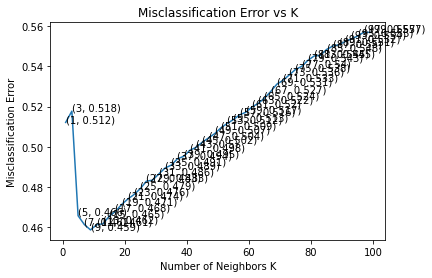

the misclassification error for each k value is :  [0.512 0.518 0.466 0.461 0.459 0.461 0.462 0.465 0.468 0.471 0.474 0.476
 0.479 0.483 0.483 0.486 0.489 0.491 0.494 0.495 0.498 0.5   0.502 0.504
 0.507 0.509 0.512 0.513 0.516 0.517 0.52  0.522 0.524 0.527 0.531 0.533
 0.536 0.538 0.54  0.543 0.545 0.545 0.548 0.55  0.551 0.552 0.554 0.555
 0.557 0.557]


9

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
optimal_k_bow = k_classifier_brute(X_train, df_train_score)
optimal_k_bow

In [17]:
#K-NN training
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 99, metric = 'minkowski' , p = 2)
classifier.fit(X_train , df_train_score)

<ipython-input-17-865f615ff5eb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train , df_train_score)


KNeighborsClassifier(n_neighbors=99)

In [18]:
#predicting using the K-NN model
y_pred = classifier.predict(X_test)
y_pred.shape

(3962,)

In [19]:
print(classification_report(df_test_score,y_pred))

                precision    recall  f1-score   support

Mixed_feelings       0.17      0.01      0.01       438
      Negative       0.62      0.01      0.02       480
      Positive       0.59      0.95      0.73      2257
     not-Tamil       0.20      0.26      0.23       176
 unknown_state       0.64      0.09      0.16       611

      accuracy                           0.57      3962
     macro avg       0.45      0.26      0.23      3962
  weighted avg       0.54      0.57      0.45      3962

